#EXERCICIO 1

Escolha uma base de dados no https://www.kaggle.com/datasets 

0) Se familiarize com sua base, não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

1) Realize sumarizacoes. Veja qual tipo de gráfico é útil para sua análise se barras, linha ou pizza

2) Faça análises estatísticas
Apresente o histograma
Calcule os quartis 
Apresente o boxplot 

Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).









## Informações da base de dados
Link do dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


Autor: Rashik Rahman





In [ ]:
# blibiotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random

In [ ]:
# le o dataset
df = pd.read_csv('/content/heart.csv', sep= ',')

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# renomeia as colunas e atribui a um novo dataset
df2 = df.rename(columns = {'age':'idade', 'sex':'sexo',
                           'cp':'td_peito', 'trtbps':'pa_repouso','chol':'colesterol',
                           'fbs':'as_jejum', 'restecg':'re_repouso', 'thalachh':'fm_cardiaca',
                           'exng':'ai_exercicio', 'oldpeak':'pico_anterior', 'slp':'declive',
                           'caa':'nv_sanguineo', 'thall':'taxa_thall', 'output':'resultado'})


In [ ]:
# exporta a base para csv
df2.to_csv("df2.csv", encoding = 'utf-8', index = False)

In [ ]:
df2

## DICIONÁRIO DE DADOS


Idade: idade do paciente

Sexo: Sexo do paciente

ai_exercicio: angina induzida por exercício (1 = sim; 0 = não)

nv_sanguineo: número de vasos principais (0-3)

td_peito : Tipo de dor no peito tipo de dor no peito

- Valor 1: angina típica
- Valor 2: angina atípica
- Valor 3: dor não anginosa
- Valor 4: assintomático

pa_repouso - pressão arterial em repouso (em mm Hg na admissão no hospital)

colesterol : colestoral em mg/dl obtido via sensor de IMC

as_jejum: (açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)

re_repouso : resultados eletrocardiográficos em repouso

- Valor 0: normal
- Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV)
- Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

fm_cardiaca: frequência cardíaca máxima alcançada

pico_anterior - pico anterior

declive - declive

taxa_thall - taxa thal

resultado:
- 0 = menos chance de ataque cardíaco
- 1 = mais chance de ataque cardíaco

# ANÁLISE EXPLORATÓRIA


In [ ]:
df2

,idade,sexo,td_peito,pa_repouso,colesterol,as_jejum,re_repouso,fm_cardiaca,ai_exercicio,pico_anterior,declive,nv_sanguineo,taxa_thall,resultado
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# informacoes sobre o dataset 2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          303 non-null    int64  
 1   sexo           303 non-null    int64  
 2   td_peito       303 non-null    int64  
 3   pa_repouso     303 non-null    int64  
 4   colesterol     303 non-null    int64  
 5   as_jejum       303 non-null    int64  
 6   re_repouso     303 non-null    int64  
 7   fm_cardiaca    303 non-null    int64  
 8   ai_exercicio   303 non-null    int64  
 9   pico_anterior  303 non-null    float64
 10  declive        303 non-null    int64  
 11  nv_sanguineo   303 non-null    int64  
 12  taxa_thall     303 non-null    int64  
 13  resultado      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# algumas medidas do dataset
df2.describe().round(2)

,idade,sexo,td_peito,pa_repouso,colesterol,as_jejum,re_repouso,fm_cardiaca,ai_exercicio,pico_anterior,declive,nv_sanguineo,taxa_thall,resultado
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Acima temos algumas medidas aritméticas, a onde conseguimos ver a quantidade de cada variável, a média, o desvio padão, o valor mínimo, o primeiro quartil, o segundo quartil, o terceiro quartil e o valor máximo. 

De acordo com a visualização acima, é possível notar que as pessoas que tem entre 50 e 65 anos tiveram mais ataques cardíacos.

# GRÁFICOS

In [ ]:
# conta o resultado agrupado pela idade
qtd_resultado_idade = df2.groupby('idade').count()['resultado']
qtd_resultado_idade

idade
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: resultado, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


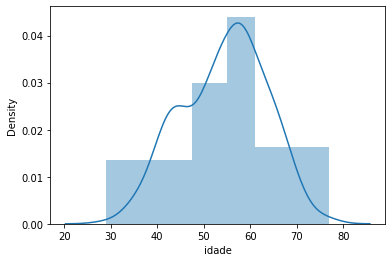

In [ ]:
# hist da idade por resultado
sns.distplot(df2['idade'], bins = [29, 47.5, 55, 61, 77])

In [ ]:
De acordo com o gráfico acima conseguimos notar que o maior numero de idades está concentrado entre 47 e 60 anos.

<Figure size 14400x7200 with 0 Axes>

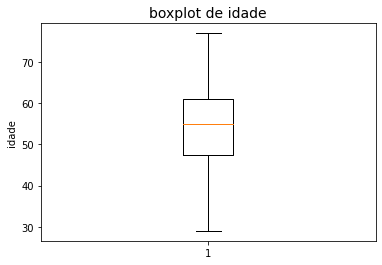

<Figure size 14400x7200 with 0 Axes>

In [ ]:
# cria um boxplot da idade
plt.boxplot(df2['idade'])
plt.title("boxplot de idade", loc="center", fontsize=14)
plt.ylabel("idade")
plt.figure(figsize =(200, 100))


Não foi constatado nenhum outlier na variável idade

<Figure size 14400x7200 with 0 Axes>

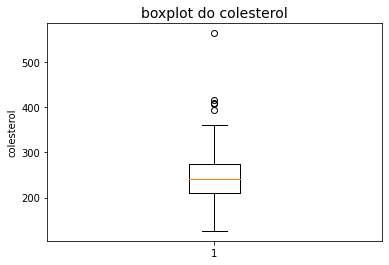

<Figure size 14400x7200 with 0 Axes>

In [ ]:
# cria um boxplot do nivel do colesterol
plt.boxplot(df2['colesterol'])
plt.title("boxplot do colesterol", loc="center", fontsize=14)
plt.ylabel("colesterol")
plt.figure(figsize =(200, 100))

De acordo com o boxplot da várivael colesterol, nota-se que há um outlier

In [ ]:
# mostra quantos dados da variavel colesterol são outliers de acordo com o boxplot
b = (df2['colesterol'] >= 450)
qtd_outlier1 = df2[b].shape[0]
print('Quantidade de outlier:', qtd_outlier1)

Quantidade de outlier: 1


<Figure size 14400x7200 with 0 Axes>

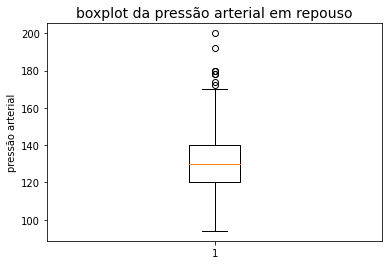

<Figure size 14400x7200 with 0 Axes>

In [ ]:
# cria um boxplot da pressão arterial em repouso
plt.boxplot(df2['pa_repouso'])
plt.title("boxplot da pressão arterial em repouso", loc="center", fontsize=14)
plt.ylabel("pressão arterial")
plt.figure(figsize =(200, 100))

De acordo com o boxplot da várivael pa_repouso, nota-se que há outliers

<Figure size 14400x7200 with 0 Axes>

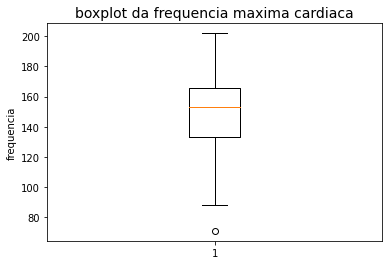

<Figure size 14400x7200 with 0 Axes>

In [ ]:
# cria um boxplot da frequencia maxima cardiaca
plt.boxplot(df2['fm_cardiaca'])
plt.title("boxplot da frequencia maxima cardiaca", loc="center", fontsize=14)
plt.ylabel("frequencia")
plt.figure(figsize =(200, 100))

De acordo com o boxplot da várivael fm_cardiaca, nota-se que há um outlier negativo

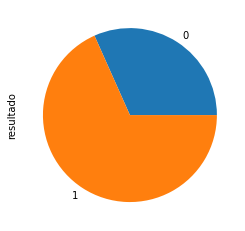

In [ ]:
# conta o resultado agrupado pela idade
qtd_resultado_sexo = df2.groupby('sexo').count()['resultado']
qtd_resultado_sexo

# plota a quanbtidade de sexo
qtd_resultado_sexo.plot(kind = 'pie')

De acordo com o gráfico acima é possível notar que os homens tiveram mais ataques cardíacos do que as mulheres.

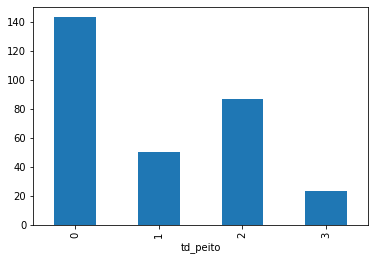

In [ ]:
# conta o resultado agrupado pela dor no peito
qtd_resultado_td_peito = df2.groupby('td_peito').count()['resultado']
qtd_resultado_td_peito

# plota a quanbtidade de sexo
qtd_resultado_td_peito.plot(kind = 'bar')

Após plotar o gráfico de barras da variável td_peito que se refere ao nível de dor no peito, nota-se que a td_peito tipo 0 é a que acontece com mais frequências, sendo um pouco mais de 140 casos.



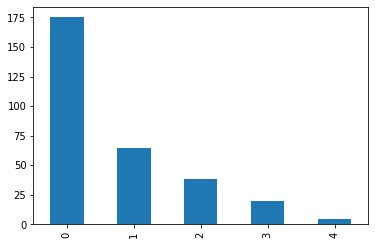

In [ ]:
# gráfico de frequência da variavel nv_sanguineo
sangue_por_resultado = df2['nv_sanguineo'].value_counts()
sangue_por_resultado.plot.bar()

Nota-se que o nv_sanguineo igual a 0 é a categoria que mais tem casos, chegando quase a 175.

In [ ]:
# correlação das variaveis do dataset 2 (variaveis originais)
df2.corr()

,idade,sexo,td_peito,pa_repouso,colesterol,as_jejum,re_repouso,fm_cardiaca,ai_exercicio,pico_anterior,declive,nv_sanguineo,taxa_thall,resultado
idade,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sexo,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
td_peito,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
pa_repouso,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
colesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
as_jejum,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
re_repouso,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
fm_cardiaca,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
ai_exercicio,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
pico_anterior,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Acima, temos a tabela de correlação de pearson, a onde nos mostra a relaçao entre as váriaveis.

O interessante para o nosso modelo são as variáveis X que mais se correlacionam com a variável Y (resultado).

Em primeiro lugar, temos a variável td_peito com 43% de relação

Em segundo lugar, temos a variável fm_cardiaca com 42% de relação

Em terceiro lugar, temos a variável re_repouso com 13% de relação

As demais variáveis possuem relação negativa.

--------------------------------------------------------------------------------

# EXERCICIO 2

Monte um algoritmo preditivo de projeção OU de classificação, utilizando respetivamente Regressão Linear ou Regressão Logística. Para tal, selecione uma base de dados adequada no https://www.kaggle.com/datasets. Antes de realizar o treino do seu algoritmo realize uma análise exploratória, principalmente correlacionando as features e o label. Identificados estes, siga o processo de treinar, validar, testar e revalidar. Não esqueça de apresentar sua conclusões de negócio (utilize o botão +texto) 


# MODELO DE REGRESSÃO LOGISTICA

In [ ]:
# divide o dataset para treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df2[['idade', 'sexo', 'td_peito', 'pa_repouso', 'colesterol', 'as_jejum', 'fm_cardiaca', 're_repouso', 
                                                             'declive', 'taxa_thall', 'nv_sanguineo', 'pico_anterior', 'ai_exercicio']], df2['resultado'], test_size = 0.2)

In [ ]:
x_treino

In [ ]:
y_treino

In [ ]:
# regressão logistica 
reglog = LogisticRegression(max_iter = 800)

In [ ]:
random.seed(123)

In [ ]:
# TREINO
# treinando o modelo na base de treino
reglog.fit(x_treino, y_treino)

# acuracia do modelo
acuracia = reglog.score(x_treino, y_treino)
print('Acurácia do modelo: ', acuracia * 100)

Acurácia do modelo:  85.9504132231405


In [ ]:
# TESTE
# treinando o modelo na base de teste
reglog.fit(x_teste, y_teste)

# acuracia do modelo
acuracia2 = reglog.score(x_teste, y_teste)
print('Acurácia do modelo: ', acuracia2 * 100)

Acurácia do modelo:  93.44262295081968


## Conclusão do modelo

- Pela variável Y (resultado) ser binária, foi usado o algoritmo de regressão logistica.

- Foi utilizado todas as variáveis no modelo, pois mesmo algumas não possuindo uma correlação positiva com a nossa variável Y (resultado) de acordo com a correlação de Pearson, este foi o modelo que mais performou.

- Em treino obteve-se uma acurácia de 85% e em teste uma acurácia de 93%.

- Sendo assim, mesmo com uma acurácia de 93% em teste, não colocariamos este modelo em produção, pois se trata de um modelo de análise e predição de ataques cardíacos, e poderiamos colocar a vida dos pacientes em risco. 

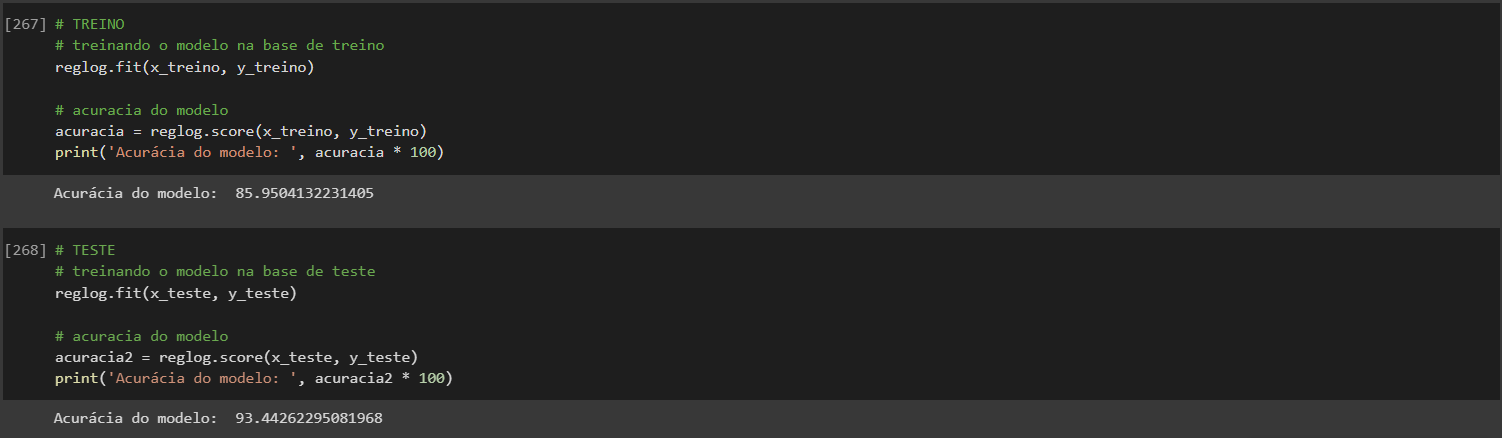

# EXERCICIO 3
Utilizando uma base de dados do Kaggle, realize uma Classificação com a Reg Logística ou Árvore de Decisão (caso na atividade anterior tenha já utilizado RegLog, utilize nesta Árvore). Não esqueça de separar treino e teste, bem como de calcular as devidas métricas. Em seguida, realize um processo de AutoML com H2O, e aí as métricas melhoraram?

# ARVORE DE DECISÃO COM SKLEARN

In [ ]:
# divide o dataset para treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df2[['idade', 'sexo', 'td_peito', 'pa_repouso', 'colesterol', 'as_jejum', 'fm_cardiaca', 're_repouso', 
                                                             'declive', 'taxa_thall', 'nv_sanguineo', 'pico_anterior', 'ai_exercicio']], df2['resultado'], test_size = 0.4)

In [ ]:
# atribui a funcao arvore de decisao a variavel tree 
tree = DecisionTreeClassifier(max_depth=6)

In [ ]:
random.seed(123)

TREINO

In [ ]:
# modelo de treino
arvore_treino = tree.fit(x_treino, y_treino)

In [ ]:
# acuracia do modelo de treino
modelo_treino = round(tree.score(x_treino, y_treino), 4)
modelo_treino * 100

97.78999999999999

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


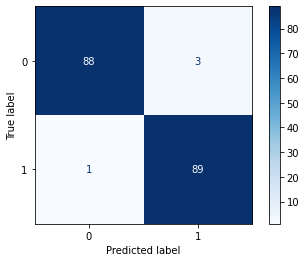

In [ ]:
# matriz de confusão de treino
plot_confusion_matrix(arvore_treino, x_treino, y_treino, cmap = plt.cm.Blues )

TESTE

In [ ]:
# modelo de teste
arvore_teste = tree.fit(x_teste, y_teste)

In [ ]:
# acuracia do modelo de teste 
modelo_teste = round(tree.score(x_teste, y_teste), 4)
modelo_teste * 100

98.36

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


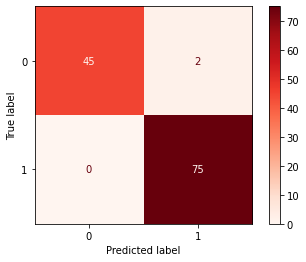

In [ ]:
# matriz de confusão de teste
plot_confusion_matrix(arvore_teste, x_teste, y_teste, cmap = plt.cm.Reds )

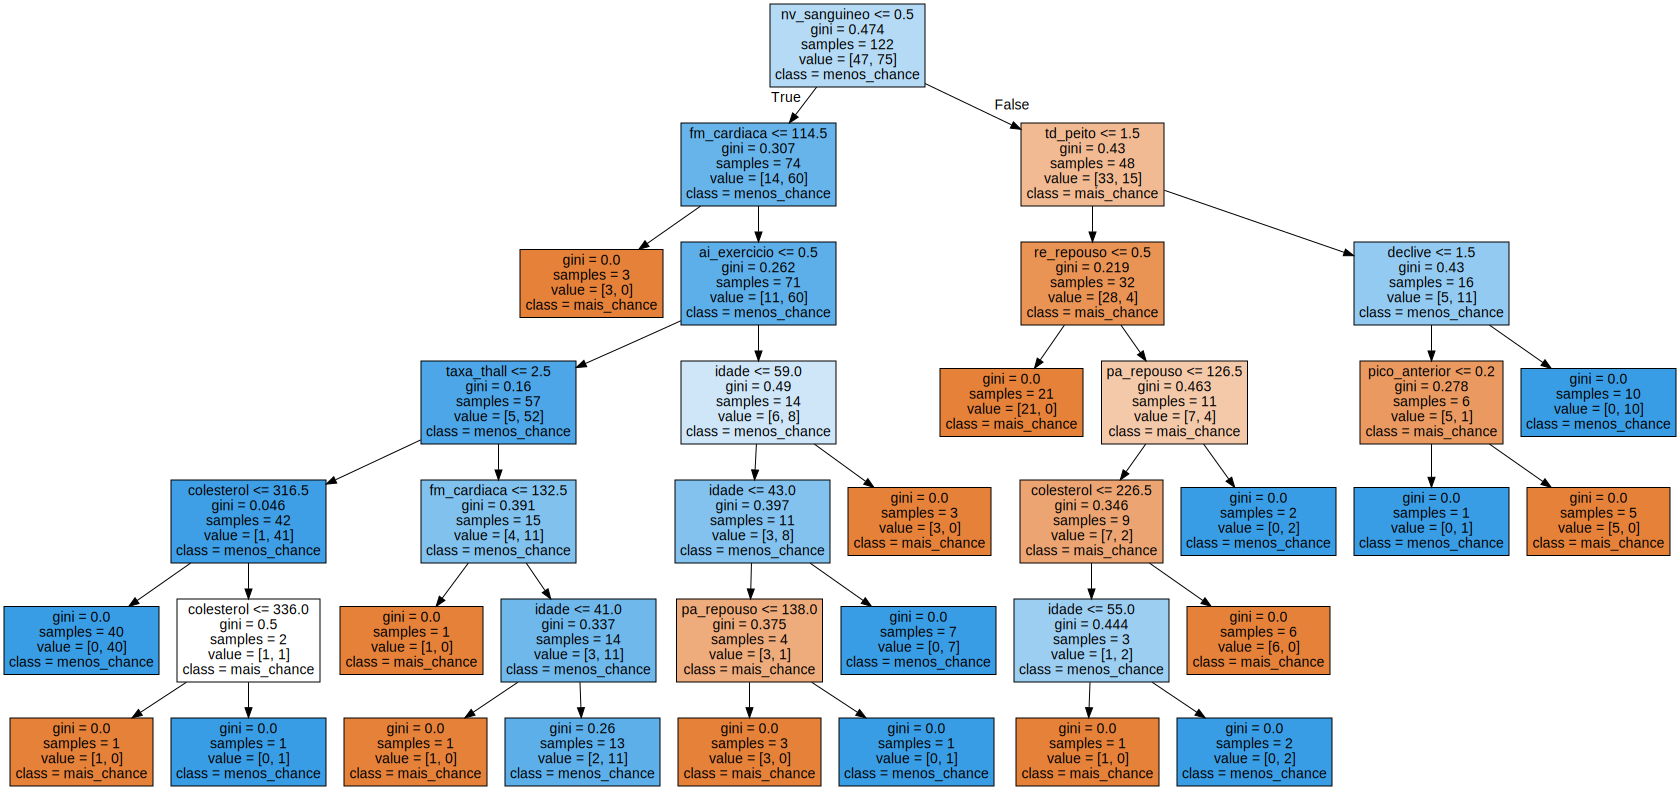

In [ ]:
# monta a arvore
dot_data = export_graphviz(arvore_teste, filled = True, feature_names = ['idade', 'sexo', 'td_peito', 'pa_repouso', 'colesterol', 'as_jejum', 'fm_cardiaca', 're_repouso', 
                                                             'declive', 'taxa_thall', 'nv_sanguineo', 'pico_anterior', 'ai_exercicio'], class_names = ['mais_chance','menos_chance'])
Source(dot_data)

# AUTO ML COM H2O

In [ ]:
!pip install h2o

In [ ]:
# faz o auto ML - hyperparameter
import h2o 
h2o.init()
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
# importa dataset
df2 = h2o.import_file('/content/df2.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df2

In [ ]:
# define a variavel como categórica
df2['resultado'] = df2['resultado'].asfactor()

In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
df3 = df2

# importa a funcao, define quantidade de modelos e quantidade de iteracoes
aml = H2OAutoML(max_models = 15, nfolds = 30)

random.seed(123)

# treina o modelo
aml.train(['idade', 'sexo', 'td_peito', 'pa_repouso', 'colesterol', 'as_jejum', 'fm_cardiaca', 're_repouso', 
            'declive', 'taxa_thall', 'nv_sanguineo', 'pico_anterior', 'ai_exercicio'], 'resultado', df3)

# printa as informacoes dos modelos e mostra a acuracia do melhor
print(aml.leaderboard.head(10))
aml.get_best_model().model_performance()

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_grid_1_AutoML_2_20230221_144145_model_1              0.927492   0.349587  0.939615                0.15303   0.333113  0.110964
GBM_2_AutoML_2_20230221_144145                           0.926482   0.350188  0.941669                0.15415   0.336694  0.113363
StackedEnsemble_AllModels_1_AutoML_2_20230221_144145     0.925516   0.344685  0.928864                0.160738  0.330531  0.10925
StackedEnsemble_BestOfFamily_1_AutoML_2_20230221_144145  0.923803   0.349227  0.922702                0.161989  0.331985  0.110214
GBM_4_AutoML_2_20230221_144145                           0.919675   0.35729   0.931766                0.171014  0.339489  0.115253
GBM_3_AutoML_2_20230221_144145                           0.918841   0.358874  0.932659                0.169829  0.34137 

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07957919944857363
RMSE: 0.28209785438491664
LogLoss: 0.27409808692495413
Mean Per-Class Error: 0.09077733860342556
AUC: 0.9670619235836628
AUCPR: 0.9735680376052681
Gini: 0.9341238471673257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6094474481385098
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      128  10   0.0725   (10.0/138.0)
1      18   147  0.1091   (18.0/165.0)
Total  146  157  0.0924   (28.0/303.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.609447     0.913043  154
max f2                       0.31102      0.940767  198
max f0point5                 0.684804     0.943012  140
max accuracy                 0.634705     0.907591  148
max precision                0.984179     1         0
max recall                   0.085976     1         249
max specificity              0.984179     1         0
max absolute_mcc             0.634705     0.818737  148
max min_per_class_accuracy   0.579933     0.89697   159
max mean_per_class_accuracy  0.634705     0.911001  148
max tns                      0.984179     138       0
max fns                      0.984179     164       0
max fps                      0.00899144   138       300
max tps                      0.085976     165       249
max tnr                      0.984179     1         0
max fnr                      0.984179     0.993939  0
max fpr                      0.00899144   1         300
max tpr                      0.085976     1         249

Gains/Lift Table: Avg response rate: 54.46 %, avg score: 54.51 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0132013                   0.980912           1.83636    1.83636            1                0.982099   1                           0.982099            0.0242424       0.0242424                  83.6364   83.6364            0.0242424
2        0.0231023                   0.980322           1.83636    1.83636            1                0.980457   1                           0.981395            0.0181818       0.0424242                  83.6364   83.6364            0.0424242
3        0.0330033                   0.976147           1.83636    1.83636            1                0.977939   1                           0.980358            0.0181818       0.0606061                  83.6364   83.6364            0.0606061
4        0.0429043                   0.969624           1.83636    1.83636            1                0.972241   1                           0.978485            0.0181818       0.0787879                  83.6364   83.6364            0.0787879
5        0.0528053                   0.96805            1.83636    1.83636            1                0.968512   1                           0.976615            0.0181818       0.0969697                  83.6364   83.6364            0.0969697
6        0.10231                     0.958819           1.83636    1.83636            1                0.963645   1                           0.970339            0.0909091       0.187879                   83.6364   83.6364            0.187879
7        0.151815                    0.930094           1.83636    1.83636            1                0.946255   1                           0.962486            0.0909091       0.278788                   83.6364   83.6364            0.278788
8        0.20132               

#CONCLUSÃO

- Apesar do AUTOML com h2o rodar varios tipos de modelos, nenhum superou a acurácia da árvore de decisão do sklearn, ou seja, os modelos erraram mais, o melhor modelo foi o GBM, com 90.75% de acurácia máxima. Ou seja, para este dataset o h2o não performou muito bem.

- Para este dataset o modelo que mais performou chegando a uma acurácia de 98.36% em teste foi a árvore de decisão do sklearn.

- Sendo assim, com esta acurácia o modelo poderia ser colocado em produção.

- De acordo com a matriz de confusão do teste, nota-se que o modelo de árvore de decisão acertou mais em dizer se o paciente tem mais chance de ter um ataque cardiáco, que é o foco da análise.

- Por seu tamanho, a árvore de decisão pode ser um pouco complexa na hora de analisa-lá.
